In [1]:
# coding=utf8
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import linear_model, tree, svm, naive_bayes, neighbors
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

features = np.loadtxt("train.csv", delimiter=",")
features_val = np.loadtxt("test.csv", delimiter=",")
features=features[:,(0,1,2,4,5,6)]
features_val=features_val[:,(0,1,2,4,5,6)]
labels = np.loadtxt("label.csv", delimiter=",")
labels_val = np.loadtxt("label111.csv", delimiter=",")

stratified_folder = StratifiedKFold(n_splits=5, random_state=0, shuffle=False)
decision_value = np.zeros((features.shape[0], 2))
prediction_label1 = np.zeros((features.shape[0], 2))

C:\Users\user\AppData\Local\conda\conda\envs\tf1.4py3.6\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\user\AppData\Local\conda\conda\envs\tf1.4py3.6\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [3]:
from sklearn.ensemble import RandomForestClassifier 
svclassifier = RandomForestClassifier(n_estimators = 400, random_state=30)
dataset_blend_test_j = np.zeros((features_val.shape[0], 5))
i=0
for train_index, test_index in stratified_folder.split(features, labels):
        X_train, y_train, X_test, y_test = features[train_index], labels[train_index], features[test_index], labels[test_index]
        svclassifier.fit(X_train, y_train)  
        predictions_svm = svclassifier.predict_proba(X_test)
        decision_value[test_index,:]= predictions_svm
        predictions_svm_val = svclassifier.predict_proba(features_val)
        dataset_blend_test_j[:, i] = predictions_svm_val[:,1]
        i+=1
        dataset_blend_test = dataset_blend_test_j.mean(1)
        decision_value1=decision_value[:,1]
        predict_label=np.argmax(decision_value, axis=1)

In [5]:
accuracy=accuracy_score(np.argmax(decision_value, axis=1), labels)
print('Accuracy: %f ' %  accuracy)
print("val auc Score: %f" % (roc_auc_score(labels, decision_value[:,1])))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(labels,np.argmax(decision_value, axis=1)))
print(classification_report(labels,np.argmax(decision_value, axis=1)))

Accuracy: 0.885572 
val auc Score: 0.943122
[[110   7]
 [ 16  68]]
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91       117
         1.0       0.91      0.81      0.86        84

    accuracy                           0.89       201
   macro avg       0.89      0.87      0.88       201
weighted avg       0.89      0.89      0.88       201



(63,)
[0.         0.23809524 0.29761905 0.3452381  0.38095238 0.39285714
 0.41666667 0.48809524 0.51190476 0.53571429 0.55952381 0.58333333
 0.60714286 0.61904762 0.64285714 0.6547619  0.70238095 0.69383394
 0.74145299 0.74481074 0.76862027 0.75152625 0.77533578 0.75824176
 0.74969475 0.7973138  0.82112332 0.81257631 0.83638584 0.82783883
 0.83119658 0.85500611 0.76098901 0.77289377 0.76434676 0.74725275
 0.67032967 0.64468864 0.63614164 0.61904762 0.61050061 0.59340659
 0.56776557 0.55067155 0.51648352 0.4993895  0.48229548 0.45665446
 0.44810745 0.42246642 0.40537241 0.37973138 0.34554335 0.33699634
 0.31990232 0.26862027 0.23443223 0.18315018 0.15750916 0.14896215
 0.10622711 0.07539683 0.        ]
(63,)
31


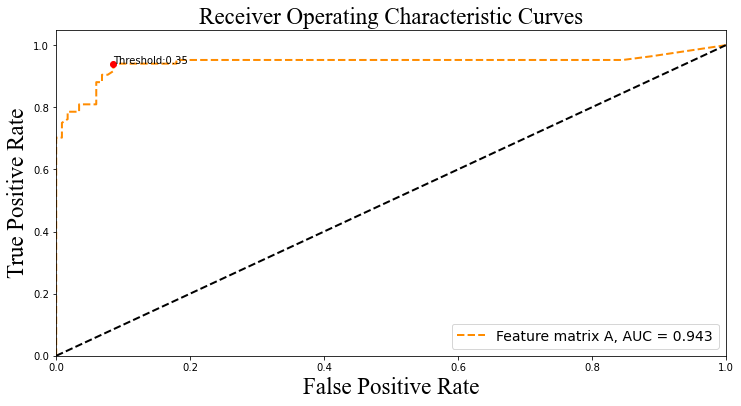

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc  
from sklearn import model_selection

fpr,tpr,threshold = roc_curve(labels, decision_value1) 
print(fpr.shape)
roc_auc = auc(fpr,tpr) 

def Find_Optimal_Cutoff(TPR, FPR, threshold):
    y = TPR - FPR
    Youden_index = np.argmax(y)  
    print(y)
    print(y.shape)
    print(Youden_index)
    optimal_threshold = threshold[Youden_index]
    point = [FPR[Youden_index], TPR[Youden_index]]
    return optimal_threshold, point
def ROC(label, y_prob):
    fpr, tpr, thresholds =roc_curve(labels, decision_value1)
    roc_auc = auc(fpr, tpr)
    optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds)
    return fpr, tpr, roc_auc, optimal_th, optimal_point

fpr, tpr, roc_auc, optimal_th, optimal_point = ROC(labels, decision_value1)

font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 23,
}

lw = 2
plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, color='darkorange',ls='--',
         lw=lw, label='Feature matrix A, AUC = %0.3f' % roc_auc) 
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('Receiver Operating Characteristic Curves',font1)
plt.legend(loc="lower right",fontsize=14)
plt.show()


In [7]:
print('敏感性：%f' % optimal_point[1])
print('特异性：%f' % (1-optimal_point[0])) 

敏感性：0.940476
特异性：0.914530


In [11]:
dataset_blend_test1=np.int64(dataset_blend_test>0.5)

In [15]:
accuracy=accuracy_score(dataset_blend_test1, labels_val)
print('Accuracy: %f ' %  accuracy)
print("val auc Score: %f" % (roc_auc_score(labels_val, dataset_blend_test)))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(labels_val,dataset_blend_test1))
print(classification_report(labels_val,dataset_blend_test1))

Accuracy: 0.850000 
val auc Score: 0.910659
[[230  37]
 [ 38 195]]
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       267
         1.0       0.84      0.84      0.84       233

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



(155,)
[0.         0.02145923 0.02575107 0.07725322 0.0944206  0.10729614
 0.12875536 0.13733906 0.1416309  0.15879828 0.39914163 0.39539631
 0.40827185 0.40452653 0.40881838 0.40507306 0.42653229 0.41904165
 0.41958818 0.41584286 0.42442655 0.42068123 0.43355677 0.42232081
 0.4309045  0.42715918 0.44003472 0.4362894  0.44058125 0.43683593
 0.462587   0.47117069 0.47975438 0.48030091 0.48459276 0.47710212
 0.48139397 0.47764865 0.48623234 0.51627526 0.52485895 0.54631818
 0.54257286 0.55544839 0.55170308 0.56028677 0.56137982 0.56567167
 0.56192635 0.59196927 0.58447863 0.59735417 0.59360885 0.60648438
 0.60273907 0.60703091 0.60328559 0.61186928 0.61616113 0.61241581
 0.62958319 0.62209256 0.63496809 0.63122277 0.67843307 0.66719712
 0.67578081 0.68007266 0.68061918 0.68491103 0.68116571 0.69833309
 0.69084246 0.72088537 0.70215878 0.71503432 0.70754368 0.7375866
 0.73384128 0.73813313 0.73064249 0.73922618 0.73548086 0.73977271
 0.7173008  0.72159264 0.66166755 0.6659594  0.66221408 

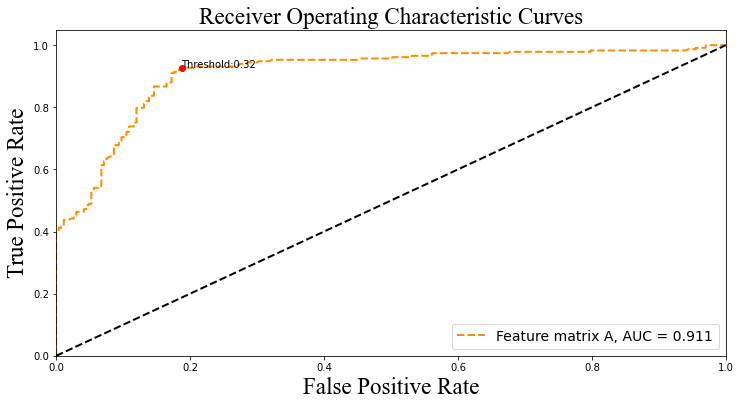

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc  
from sklearn import model_selection

fpr,tpr,threshold= roc_curve(labels_val, dataset_blend_test) 
print(fpr.shape)
roc_auc = auc(fpr,tpr) 

def Find_Optimal_Cutoff(TPR, FPR, threshold):
    y = TPR - FPR
    Youden_index = np.argmax(y)  
    print(y)
    print(y.shape)
    print(Youden_index)
    optimal_threshold = threshold[Youden_index]
    point = [FPR[Youden_index], TPR[Youden_index]]
    return optimal_threshold, point
def ROC(label, y_prob):
    fpr, tpr, thresholds =roc_curve(labels_val, dataset_blend_test)
    roc_auc = auc(fpr, tpr)
    optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds)
    return fpr, tpr, roc_auc, optimal_th, optimal_point

fpr, tpr, roc_auc, optimal_th, optimal_point = ROC(labels_val, dataset_blend_test)

font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 23,
}

lw = 2
plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, color='darkorange',ls='--',
         lw=lw, label='Feature matrix A, AUC = %0.3f' % roc_auc) 
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('Receiver Operating Characteristic Curves',font1)
plt.legend(loc="lower right",fontsize=14)
plt.show()


In [17]:
print('敏感性：%f' % optimal_point[1])
print('特异性：%f' % (1-optimal_point[0])) 

敏感性：0.927039
特异性：0.812734
